In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

sklearn内置的手写数字数据集

In [2]:
digits_df = datasets.load_digits()
print('Digits dataset structure= ', dir(digits_df))
print('Data shape= ', digits_df.data.shape)
print('Data conatins pixel representation of each image, \n', digits_df.data)

Digits dataset structure=  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
Data shape=  (1797, 64)
Data conatins pixel representation of each image, 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


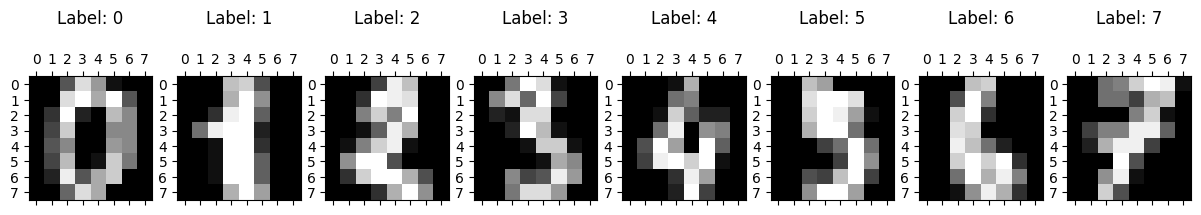

In [5]:
rows = 1
columns = 8
fig, ax =  plt.subplots(rows, columns, figsize = (15,6))

plt.gray()
for i in range(columns):
  ax[i].matshow(digits_df.images[i]) 
  ax[i].set_title('Label: %s\n' % digits_df.target_names[i])

plt.show()

In [6]:
X = digits_df.data
y = digits_df.target

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.2, random_state = 1)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (1437, 64)
X_test dimension=  (360, 64)
y_train dimension=  (1437,)
y_train dimension=  (360,)


In [9]:
lm = linear_model.LogisticRegression(random_state = 0, solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

Predicted value is = [4]
Actual value from test data is 4 and corresponding image is as below


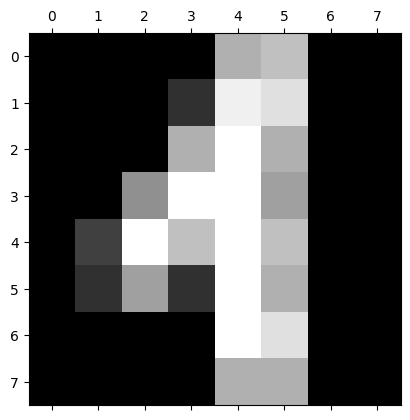

In [10]:
print('Predicted value is =', lm.predict([X_test[200]]))

print('Actual value from test data is %s and corresponding image is as below' % (y_test[200]) )
plt.matshow(digits_df.images[200]) 
plt.show() 

In [11]:
lm.score(X_test, y_test)

0.9694444444444444

TypeError: ConfusionMatrixDisplay.__init__() takes 2 positional arguments but 4 positional arguments (and 1 keyword-only argument) were given

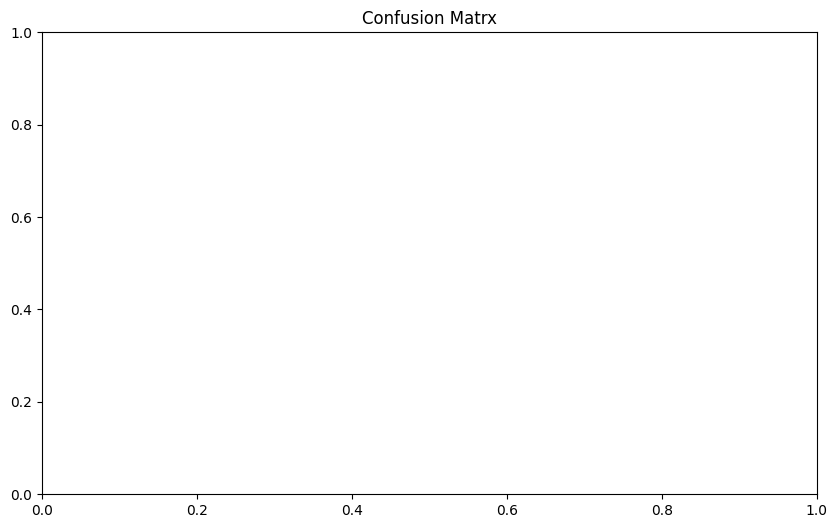

In [14]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.ConfusionMatrixDisplay(lm, X_test, y_test, display_labels= digits_df.target_names, ax = ax)
disp.confusion_matrix